In [35]:
import pandas as pd

dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace = True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [36]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [37]:
dataframe.fillna(dataframe.median(), inplace = True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [38]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [46]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3643680838174791


In [47]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0760764637641715


In [48]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.777853750359


In [49]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [50]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.440519908274


In [51]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3645412082353538 1.0759109484969387 3431.794135866532


In [52]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3070013252883051 1.1437448778152333 3018.0905637277097


In [54]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [58]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03964822452603958 3.5168918943009375 302.5500445589933
0.3645412082353538 1.0759109484969387 3431.794135866532


In [60]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36860616119966266 1.0569340233845512 1204.1002709006202
0.35416642754504835 1.138230644599316 1194.951986504888
0.36713104970461446 1.0991014125845049 1167.5075975296127


<function matplotlib.pyplot.show(close=None, block=None)>

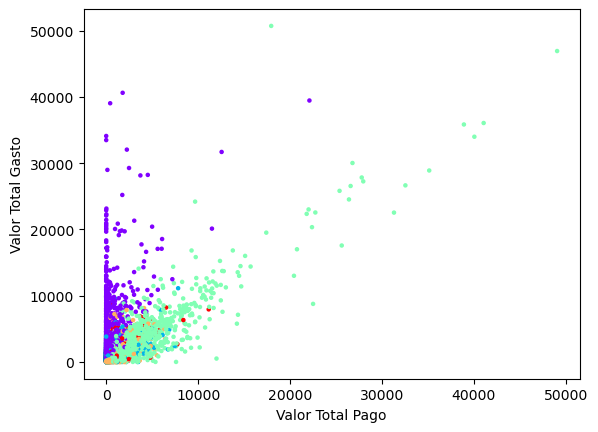

In [63]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor Total Pago")
plt.ylabel("Valor Total Gasto")
plt.show

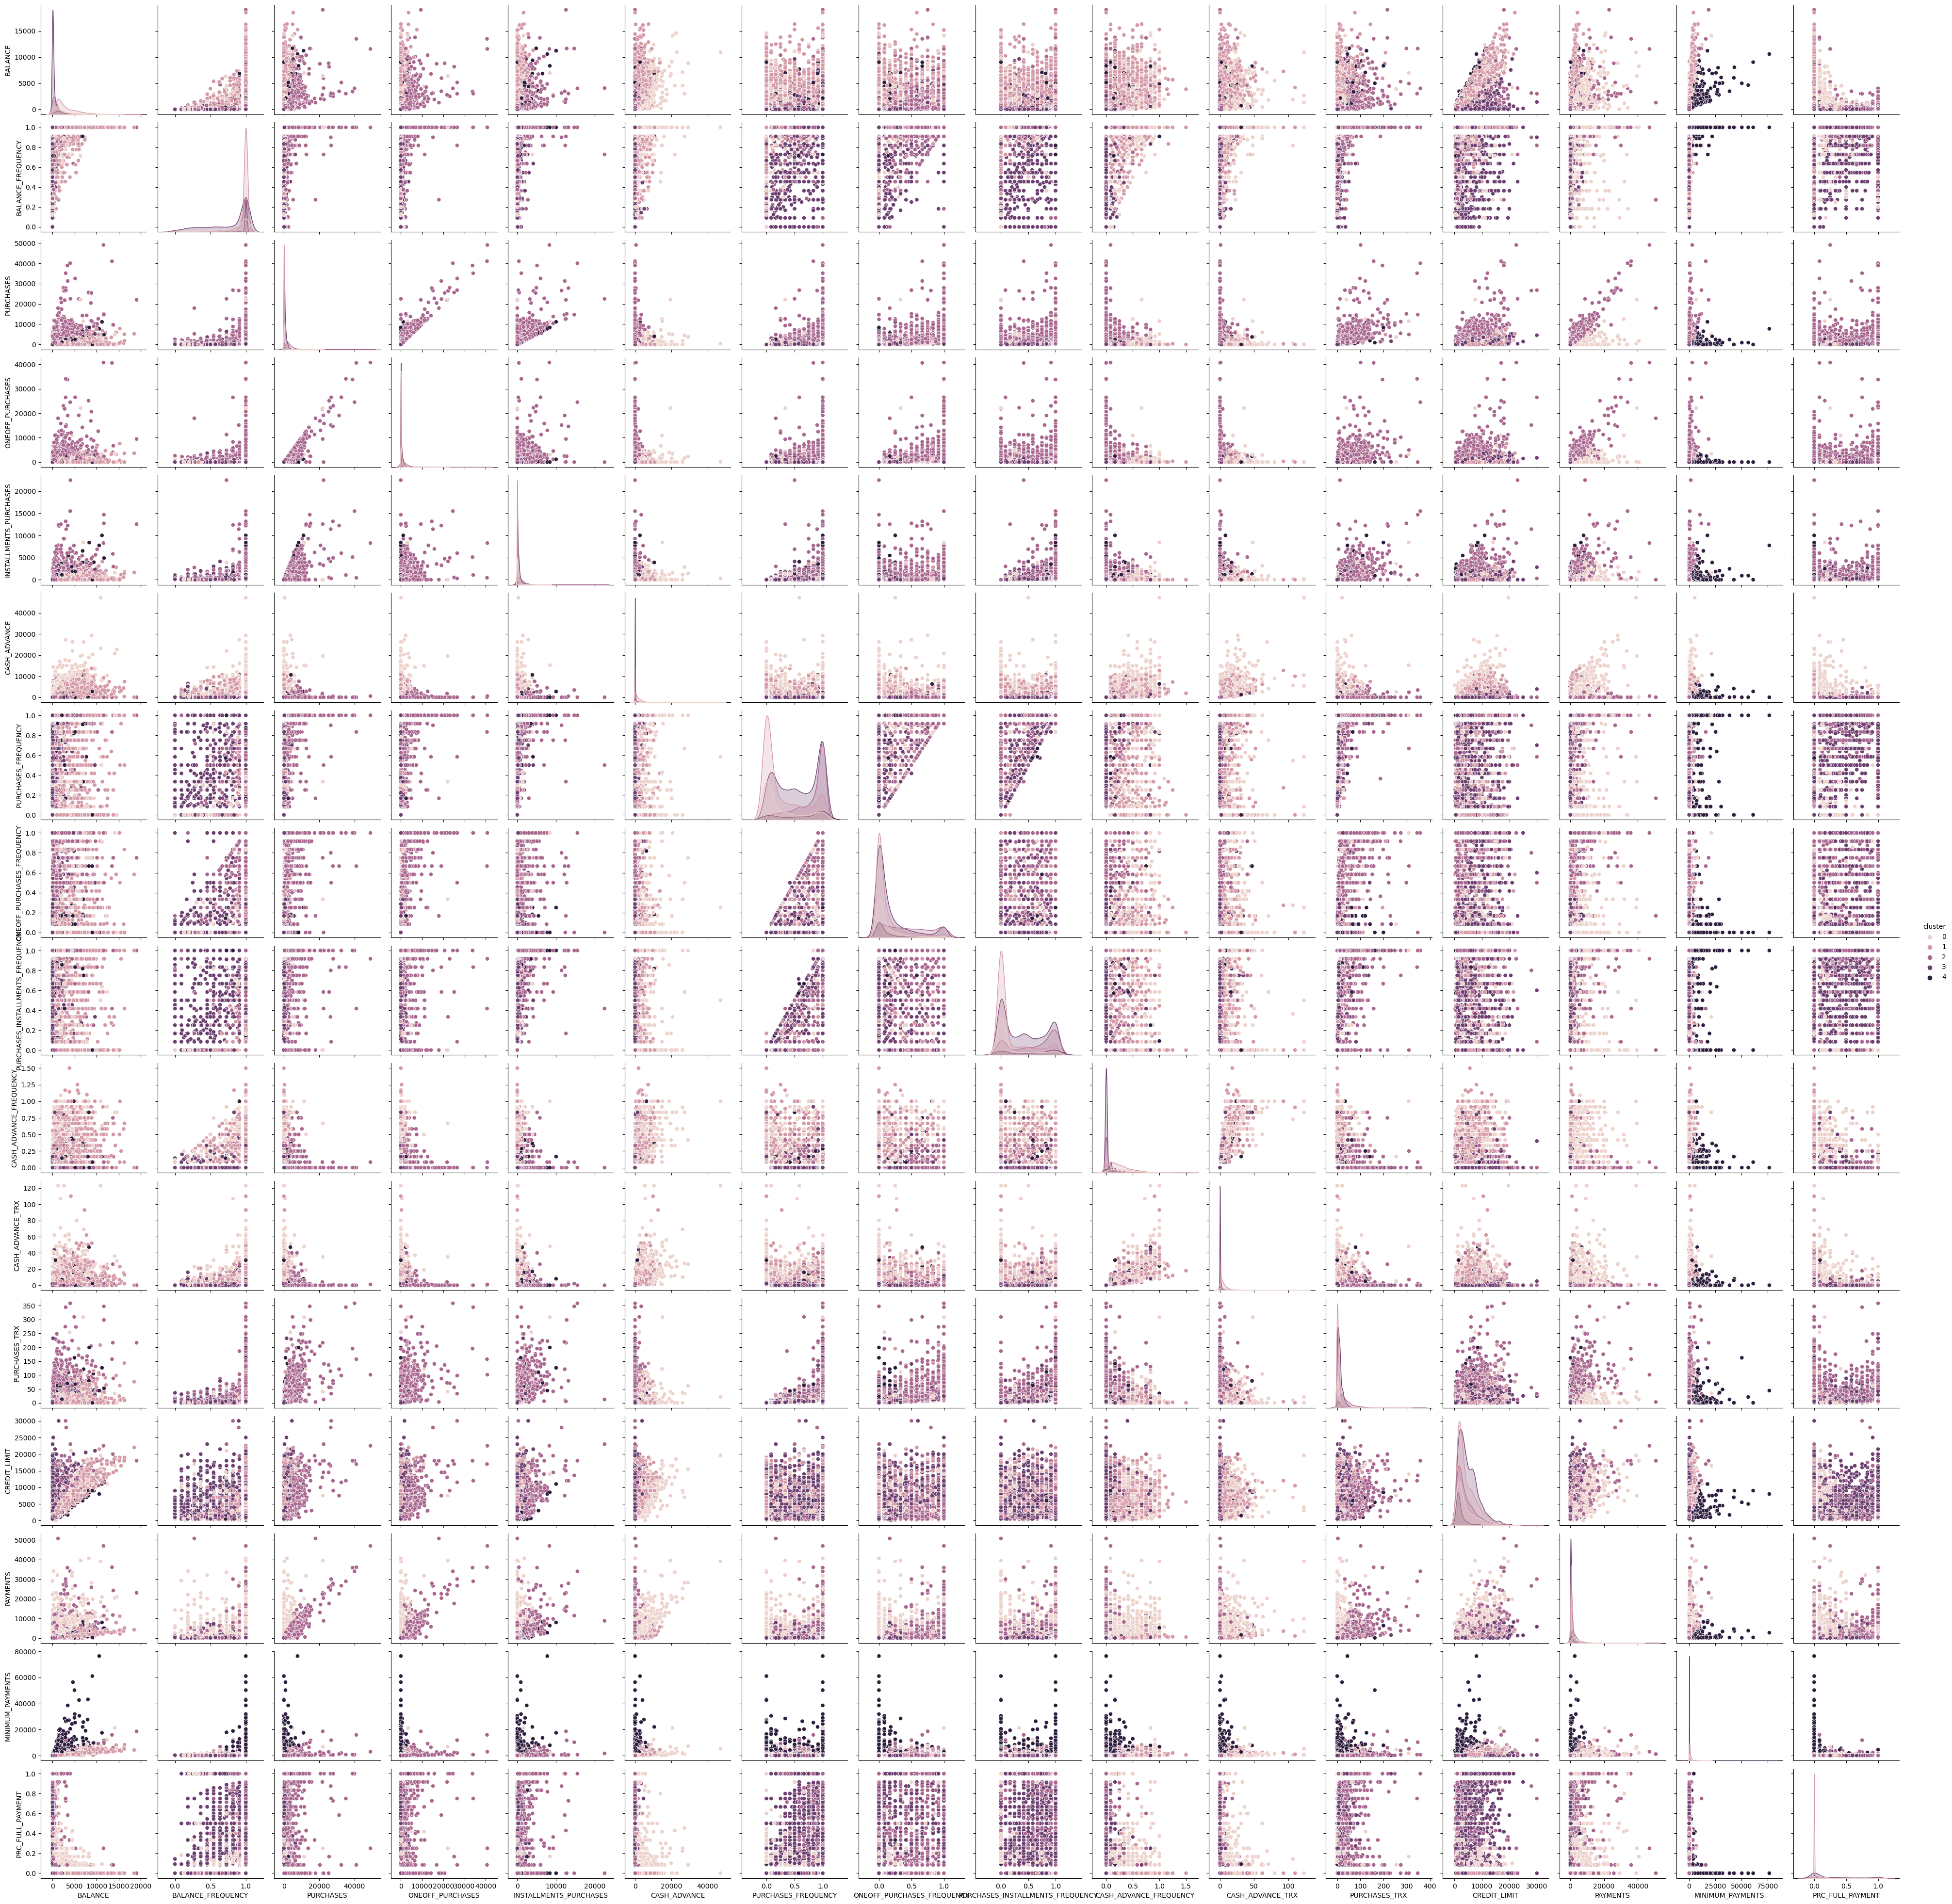

In [64]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

In [65]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1073.0  1794.764536  1982.173844   0.000000   507.076999   
1        2646.0  3034.386903  2476.461110   6.824905  1255.154881   
2        1544.0  1148.959844  1680.498652   0.000000   210.375599   
3        3275.0   444.146902   846.930394   0.000000    23.283648   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1088.056301  2315.003636  14581.459140            1073.0  0.862156   
1        2172.596565  4223.606243  18495.558550            2646.0  0.963741   
2         554.332740  1370.859355  19043.138560            1544.0  0.928239   
3          82.980060   410.659944   9630.367575            3275.0  0.774211   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       886.322345  21235.065300           1073.0  0.117275   
1        ...      1330.100937   8345.641905           2646.0  0.001801   
2        ...       524.184580  18621.013310           1544.0  0.278724   
3        ...       248.968369   4483.503862           3275.0  0.246368   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186801  0.0  0.0  0.083333  0.142857  1.0  
1        0.023273  0.0  0.0  0.000000  0.000000  0.6  
2        0.367326  0.0  0.0  0.083333  0.545455  1.0  
3        0.346480  0.0  0.0  0.000000  0.444444  1.0  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [66]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.35317569e-01 2.16489198e-04 6.04496610e-02 3.43849416e-02
  2.60699292e-02 4.00329698e-01 5.27098698e-05 2.04691453e-05
  3.52611341e-05 6.55102544e-05 1.57205221e-03 1.12372153e-03
  5.35048542e-01 5.97748295e-01 1.04521037e-01 2.77239617e-05]
 [5.04072367e-01 2.72284601e-04 6.14951436e-02 3.61370321e-02
  2.53798410e-02 2.53108530e-01 6.71483888e-05 2.56845751e-05
  4.48838933e-05 5.74747433e-05 1.15775149e-03 1.32631477e-03
  7.19411813e-01 1.65994396e-01 1.79095726e-01 5.52720859e-07]
 [1.59970277e-01 2.45420653e-04 4.37832758e-01 2.56342445e-01
  1.81661269e-01 2.57701902e-02 2.04632150e-04 8.87805917e-05
  1.51042337e-04 9.36227386e-06 1.69268877e-04 6.17437812e-03
  6.04822057e-01 4.02343053e-01 8.52508929e-02 7.25704005e-05]
 [6.90354147e-02 2.30537477e-04 1.21263619e-01 4.79919449e-02
  7.33721173e-02 2.41761600e-02 1.72670253e-04 3.37032346e-05
  1.40085560e-04 7.91321911e-06 1.23658802e-04 2.85892435e-03
  9.43812656e-01 1.53487377e-01 5.68225681e-02 7.58672019e-05]
 [3.

In [67]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0540
PRC_FULL_PAYMENT 
0.0000


BALANCE 0.0224
PURCHASES 0.0196
CASH_ADVANCE 0.0226
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
MINIMUM_PAYMENTS 0.0542

In [72]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
print(description.mean())

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0        1794.764536   475.785508   3270.705696   3975.462453  4706.788521
1        3034.386903   381.569448   1637.351111   4490.438398   965.988756
2        1148.959844  3267.501781    182.614490   4107.357611  3035.900502
3         444.146902   628.970831    141.666342   5135.052448   814.094493
4        1987.146873   858.326286    420.107194   2226.699029  1338.974045


C:\Users\Felipe Martins\AppData\Local\Temp\ipykernel_25240\45307257.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [75]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1794.764536   475.785508   3270.705696   3975.462453  4706.788521   
1        3034.386903   381.569448   1637.351111   4490.438398   965.988756   
2        1148.959844  3267.501781    182.614490   4107.357611  3035.900502   
3         444.146902   628.970831    141.666342   5135.052448   814.094493   
4        1987.146873   858.326286    420.107194   2226.699029  1338.974045   

         n_clients  
cluster             
0             1073  
1             2646  
2             1544  
3             3275  
4              412  


C:\Users\Felipe Martins\AppData\Local\Temp\ipykernel_25240\2296433210.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [76]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        1073.0  0.117275  0.186801  0.0  0.0  0.083333  0.142857  1.0
1        2646.0  0.001801  0.023273  0.0  0.0  0.000000  0.000000  0.6
2        1544.0  0.278724  0.367326  0.0  0.0  0.083333  0.545455  1.0
3        3275.0  0.246368  0.346480  0.0  0.0  0.000000  0.444444  1.0
4         412.0  0.019271  0.090795  0.0  0.0  0.000000  0.000000  1.0

CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.